In [41]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [42]:
from fastai.structured import *
from fastai.column_data import *
import pandas as pd
np.set_printoptions(threshold=50, edgeitems=20)

PATH = 'data/'

In [43]:
from fastai.imports import *
from fastai.structured import *

from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display

from sklearn import metrics

In [44]:
df=pd.read_pickle('df1.pkl')

In [45]:
df2=pd.read_pickle('df_7.pkl')

In [46]:
df2.head()

,atom_name,residue_name,chain_id,residue_number,x_coord,y_coord,z_coord,b_factor
307,C,GLU,A,379,17.739,22.448,19.245,49.91
308,O,GLU,A,379,18.690,22.852,19.921,48.38
309,CB,GLU,A,379,16.840,20.394,20.375,58.83
310,CG,GLU,A,379,18.044,20.300,21.314,67.23
311,CD,GLU,A,379,17.859,21.078,22.620,71.93


In [47]:
slen= len(df2['atom_name'])
e= pd.Series(np.random.randn(slen))

In [1]:
df2= df2.assign(atom_number=e.values)

NameError: name 'df2' is not defined

In [49]:
df=df2

In [50]:
df.head()

,atom_name,residue_name,chain_id,residue_number,x_coord,y_coord,z_coord,b_factor,atom_number
307,C,GLU,A,379,17.739,22.448,19.245,49.91,-2.391129
308,O,GLU,A,379,18.690,22.852,19.921,48.38,-2.036416
309,CB,GLU,A,379,16.840,20.394,20.375,58.83,0.776452
310,CG,GLU,A,379,18.044,20.300,21.314,67.23,-0.742974
311,CD,GLU,A,379,17.859,21.078,22.620,71.93,-1.978430


In [51]:
# from sklearn.utils import shuffle

In [52]:
# df= shuffle(df)

In [53]:
cat_vars = ['atom_name', 'residue_name', 'chain_id',
       'residue_number']

In [54]:
contin_vars = ['x_coord', 'y_coord', 'z_coord']

In [55]:
for v in cat_vars: df[v] = df[v].astype('category').cat.as_ordered()

In [56]:
for v in contin_vars:
    df[v] = df[v].fillna(0).astype('float32')

In [57]:
train_cats(df)

In [58]:
df.columns

Index(['atom_name', 'residue_name', 'chain_id', 'residue_number', 'x_coord',
       'y_coord', 'z_coord', 'b_factor', 'atom_number'],
      dtype='object')

In [59]:
y=df.drop(['atom_name', 'residue_name', 'chain_id', 'residue_number','b_factor', 'atom_number'],axis=1)
y.head()

,x_coord,y_coord,z_coord
307,17.739000,22.448000,19.245001
308,18.690001,22.851999,19.921000
309,16.840000,20.393999,20.375000
310,18.044001,20.299999,21.313999
311,17.858999,21.077999,22.620001


In [60]:
y=y.values

In [61]:
df.head()

,atom_name,residue_name,chain_id,residue_number,x_coord,y_coord,z_coord,b_factor,atom_number
307,C,GLU,A,379,17.739000,22.448000,19.245001,49.91,-2.391129
308,O,GLU,A,379,18.690001,22.851999,19.921000,48.38,-2.036416
309,CB,GLU,A,379,16.840000,20.393999,20.375000,58.83,0.776452
310,CG,GLU,A,379,18.044001,20.299999,21.313999,67.23,-0.742974
311,CD,GLU,A,379,17.858999,21.077999,22.620001,71.93,-1.978430


In [62]:
df=df.drop(['x_coord','y_coord', 'z_coord'],axis=1)
df.head(10)

,atom_name,residue_name,chain_id,residue_number,b_factor,atom_number
307,C,GLU,A,379,49.91,-2.391129
308,O,GLU,A,379,48.38,-2.036416
309,CB,GLU,A,379,58.83,0.776452
310,CG,GLU,A,379,67.23,-0.742974
311,CD,GLU,A,379,71.93,-1.978430
312,OE1,GLU,A,379,72.30,1.254052
313,OE2,GLU,A,379,73.80,0.776981
328,CA,LYS,A,382,44.53,-0.449788
329,C,LYS,A,382,45.04,-1.052135
330,O,LYS,A,382,46.63,-0.655296


In [63]:
df.head(30)

,atom_name,residue_name,chain_id,residue_number,b_factor,atom_number
307,C,GLU,A,379,49.91,-2.391129
308,O,GLU,A,379,48.38,-2.036416
309,CB,GLU,A,379,58.83,0.776452
310,CG,GLU,A,379,67.23,-0.742974
311,CD,GLU,A,379,71.93,-1.978430
312,OE1,GLU,A,379,72.30,1.254052
313,OE2,GLU,A,379,73.80,0.776981
328,CA,LYS,A,382,44.53,-0.449788
329,C,LYS,A,382,45.04,-1.052135
330,O,LYS,A,382,46.63,-0.655296


In [64]:
df1, d, nas, mapper = proc_df(df, 'atom_number', do_scale=True)

In [65]:
# y=y.values

In [66]:
train_ratio = 0.75
# train_ratio = 0.9
train_size = int(len(df1) * train_ratio); train_size
val_idx = list(range(train_size, len(df1)))

In [67]:
df_test=pd.read_pickle('df_test.pkl')

In [68]:
md = ColumnarModelData.from_data_frame(PATH, val_idx, df1, y.astype(np.float32), cat_flds=cat_vars, bs=64,test_df=df_test)

In [69]:
cat_sz = [(c, len(df[c].cat.categories)+1) for c in cat_vars]

In [70]:
cat_sz

[('atom_name', 81),
 ('residue_name', 22),
 ('chain_id', 17),
 ('residue_number', 827)]

In [71]:
emb_szs = [(c, min(50, (c+1)//2)) for _,c in cat_sz]

In [72]:
emb_szs

[(81, 41), (22, 11), (17, 9), (827, 50)]

In [75]:
m = md.get_learner(emb_szs, 1,
                   0.01, 3, [1000,500], [0.04,0.06])


RuntimeError: cuda runtime error (59) : device-side assert triggered at /opt/conda/conda-bld/pytorch_1518244421288/work/torch/lib/THC/generic/THCTensorCopy.c:20

In [74]:
m.load('m_best')

RuntimeError: While copying the parameter named embs.0.weight, whose dimensions in the model are torch.Size([81, 41]) and whose dimensions in the checkpoint are torch.Size([81, 41]).

In [35]:
m.lr_find()

 61%|██████▏   | 158/257 [00:01<00:01, 81.75it/s, loss=10.8]


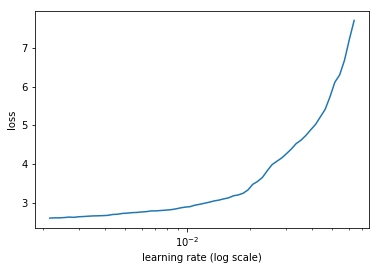

In [43]:
m.sched.plot(100)

In [44]:
lr = 8e-5

In [45]:
m.fit(lr, 10, cycle_len=4)

[0.      2.55736 1.90118]                                    
[1.      2.52517 1.93433]                                    
 51%|█████▏    | 132/257 [00:00<00:00, 204.19it/s, loss=2.53]


KeyboardInterrupt: 

 51%|█████▏    | 132/257 [00:20<00:18,  6.60it/s, loss=2.53] 

In [36]:
x,y = m.predict_with_targs()

In [78]:
import matplotlib.pyplot as plt 
# from matplotlib import style
# style.use('ggplot')

ValueError: x and y can be no greater than 2-D, but have shapes (10928,) and (10928, 1, 3)

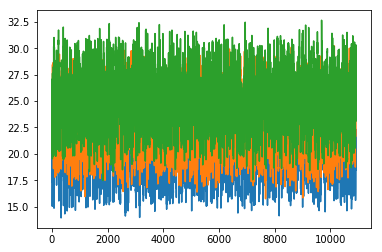

In [79]:
plt.plot(x)
plt.plot(y,'b')
plt.show()

In [89]:
xi = np.empty((100,1))
for i in range(100):
    b=x[i][0]
    xi[i]=b

In [90]:
yi = np.empty((100,1))
for i in range(100):
    b=x[i][1]
    yi[i]=b

In [91]:
zi = np.empty((100,1))
for i in range(100):
    b=x[i][2]
    zi[i]=b

In [92]:
xyi = np.empty((100,1))
for i in range(100):
    b=y[i][0][0]
    xyi[i]=b

In [93]:
yyi = np.empty((100,1))
for i in range(100):
    b=y[i][0][1]
    yyi[i]=b

In [94]:
zyi = np.empty((100,1))
for i in range(100):
    b=y[i][0][2]
    zyi[i]=b

In [95]:
# m.save('m_best')

In [96]:
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D



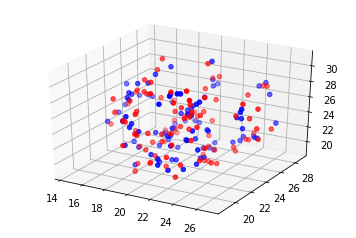

In [97]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xi, yi, zi, c = 'b', marker='o')
#    ax.set_xlabel('X-axis')
#    ax.set_ylabel('Y-axis')
#    ax.set_zlabel('Z-axis')
ax.scatter(xyi, yyi, zyi, c = 'r', marker='o')
plt.show()

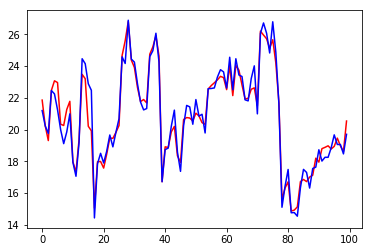

In [99]:
plt.plot(xi,'r')
plt.plot(xyi,'b')
plt.show()

In [178]:
x_df = pd.DataFrame(x)

In [180]:
x_df.to_csv("preds.csv", header=None)

In [202]:
y_df=pd.DataFrame(yn)

In [1]:
y_df.to_csv("targs.csv", header=None)

NameError: name 'y_df' is not defined

In [39]:
pred_test=m.predict()

RuntimeError: cuda runtime error (59) : device-side assert triggered at /opt/conda/conda-bld/pytorch_1518244421288/work/torch/lib/THC/generic/THCTensorCopy.c:132

In [38]:
??m.predict(True)